# [CNN - Exercise](https://fhict.instructure.com/courses/13057/assignments/219939)

### Relevant Modules

[CNN - How to apply?](https://fhict.instructure.com/courses/13057/pages/cnn-how-to-apply?module_item_id=921376) <br>
[CNN - Theoretical background](https://fhict.instructure.com/courses/13057/pages/cnn-theoretical-background?module_item_id=921375)

### Description
Choose an image classification problem that is well-suited to be solved using transfer learning. <br>
Choose a suitable pretrained model, <br>
re-use the weights of the convolutional layers, <br>
and train the dense layers using a series of input images of your own choice. <br>

Hand in your Jupyter notebook which also functions as a research report. 
You describe the context of the problem at hand, the methods, the results, and your conclusion. <br>
To show progress of training, you should create plots of accuracy and loss versus epoch number.  <br>
For evaluation, you should construct a confusion matrix and discuss your findings.  <br>
In addition, you can show some example test images that are classified right and some that are classified wrong. This gives an idea of what your network is capable of (in addition to your confusion matrix and other evaluation metrics).

### Deliverable
Convert your Jupyter notebook to html and deliver the .html file. 


***

#### ToDo
- Pretrained model
- Plots


***
## Imports

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # or any {‘0’, ‘1’, ‘2’}

import tensorflow as tf
from tensorflow import keras

import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

import numpy as np
import seaborn as sns

from datetime import datetime

######################

print(tf.__version__)
print(keras.__version__)
print(matplotlib.__version__)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

2.11.0
2.11.0
3.7.0
1.5.3
1.23.4
0.12.2


### GPU

> docker run -it -p 8888:8888 --gpus all tensorflow/tensorflow:latest-gpu-jupyter

Add `--rm` after "-it" delete container after use

[Jupyter notebook](http://127.0.0.1:8888/?token=ff8fb0c4e52f38517f21a83ba7860fa3f21246ea1f526497)

[Only working guide on youtube, other ones are for tf 2.10 and dont work](https://www.youtube.com/watch?v=YozfiLI1ogY)

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

print(f"Is built with CUDA {tf.test.is_built_with_cuda()}")

Num GPUs Available:  1
Is built with CUDA True


## Data

dataset is to large to include in git, see: [Bird dataset](https://www.kaggle.com/datasets/gpiosenka/100-bird-species) or `https://www.kaggle.com/datasets/gpiosenka/100-bird-species` for source of dataset. 

(Place unzipped into "./datasets/bird_data_set/" for usage)

In [3]:
df = pd.read_csv('./datasets/bird_data_set/birds.csv', sep=',')

df.head()

,class id,filepaths,labels,data set,scientific name
0,0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,Malacocincla abbotti
1,0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,Malacocincla abbotti
2,0,train/ABBOTTS BABBLER/003.jpg,ABBOTTS BABBLER,train,Malacocincla abbotti
3,0,train/ABBOTTS BABBLER/004.jpg,ABBOTTS BABBLER,train,Malacocincla abbotti
4,0,train/ABBOTTS BABBLER/005.jpg,ABBOTTS BABBLER,train,Malacocincla abbotti


In [4]:
birds_in_train = len(os.listdir("./datasets/bird_data_set/train"))
birds_in_test = len(os.listdir("./datasets/bird_data_set/test"))
birds_in_csv = len(df.labels.unique())

print(f"There are {birds_in_train} bird species in train, {birds_in_csv} in csv, and {birds_in_test} bird species in test")

There are 500 bird species in train, 500 in csv, and 500 bird species in test


(224, 224, 3)

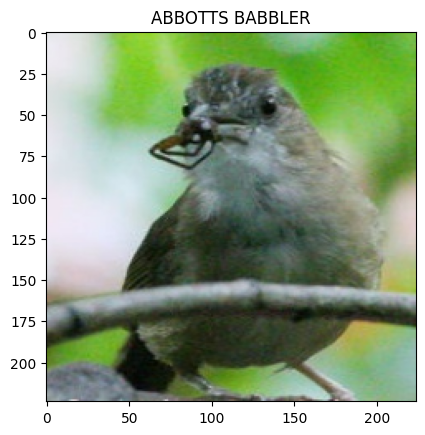

In [5]:
def view_bird_species(species_to_view = 'ABBOTTS BABBLER'):
    path = "./datasets/bird_data_set/train/" + species_to_view + "/"

    image = mpimg.imread(path + os.listdir(path)[-1])    
    
    plt.imshow(image)
    plt.title(species_to_view)

    return image.shape

view_bird_species()  # Without assigning it prints pixel arr

In [6]:
dir_train = "./datasets/bird_data_set/train/"
dir_test = "./datasets/bird_data_set/test/"
dir_vali = "./datasets/bird_data_set/valid/"

In [7]:
# ToDo: rewrite into non deprecated code.
#
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
#

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

data_train = train_datagen.flow_from_directory(directory = dir_train,
                                               batch_size= 32,
                                               target_size= (224,224),
                                               class_mode = "categorical")

data_test = test_datagen.flow_from_directory(directory = dir_test,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")

data_vali = valid_datagen.flow_from_directory(directory = dir_vali,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")

Found 80086 images belonging to 500 classes.
Found 2500 images belonging to 500 classes.
Found 2500 images belonging to 500 classes.


# Models

Was curious how well a model without pretraining would perform considering the amount of classes (500 birds some of which look very similar). So for Model_0 and Model_1 I'm not using any transfer learning. See Model_2P for a model with transfer learning.


Summary of results Models:

|                           |Model_0 | Model_1|Model_2p|Model_3p|Model_2f|Model_3f|
|-----                      |--------|--------|--------|--------|--------|--------|
|Last Training Accuracy     |0.0000  |0.0000  |0.8533  |0.8551  |0.0000  |0.0000  |
|Last Validation Accuracy   |0.0000  |0.0000  |0.8360  |0.8280  |0.0000  |0.0000  |
|Test Accuracy              |0.0000  |0.0000  |0.8572  |0.8628  |0.0000  |0.0000  |
|Test Loss                  |0.0000  |0.0000  |0.7461  |0.7038  |0.0000  |0.0000  |



 
 ***
 
## Not pretrained models

### Model_0 (not pretrained)

In [ ]:
tf.keras.backend.clear_session()

model_0 = tf.keras.models.Sequential()

model_0.add(tf.keras.layers.Conv2D(224, (3,3), activation='relu', input_shape=(224,224,3)))
model_0.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_0.add(tf.keras.layers.Conv2D(256, (3,3), activation='relu'))
model_0.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_0.add(tf.keras.layers.Conv2D(256, (3,3), activation='relu'))
model_0.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_0.add(tf.keras.layers.Flatten()) 
model_0.add(tf.keras.layers.Dense(512, activation='relu')) 
model_0.add(tf.keras.layers.BatchNormalization())
model_0.add(tf.keras.layers.Dense(500)) 
model_0.add(tf.keras.layers.Activation('softmax'))

model_0.summary()

In [ ]:
model_0.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# history_0 = model_0.fit_generator(
#     data_train, 
#     epochs = 1,
#     validation_data = data_vali,
#     steps_per_epoch=1000,
#     verbose = 1)


history_0 = model_0.fit(
    data_train,
    #steps_per_epoch=len(data_train),
    validation_data=data_vali,
    validation_steps=len(data_vali),
    epochs=1,
    verbose = 1)


***

In [ ]:
test_loss_0, test_acc_0 = model_0.evaluate(data_test, batch_size=1, verbose=1)

#### Save model

In [ ]:
date_string = datetime.now().strftime("%Y%m%d%H%M")

model_0.save(f'saved_models/CNN/model_0_{date_string}')

In [ ]:
!ls saved_models/CNN/model_0_{date_string}

In [ ]:
loaded_model = tf.keras.models.load_model('saved_models/CNN/model_0_202303041003')

# Check its architecture
loaded_model.summary()


In [ ]:
loss, acc = loaded_model.evaluate(data_test, batch_size=1, verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))
print(loaded_model.predict(data_test).shape)

***


### Model_1 (not pretrained)

One more try at making a decent model without pretraining

In [ ]:
model_1 = tf.keras.models.Sequential()

model_1.add(tf.keras.layers.Conv2D(224, (3,3), activation='relu', input_shape=(224,224,3)))
model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_1.add(tf.keras.layers.Conv2D(256, (3,3), activation='relu'))
model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_1.add(tf.keras.layers.BatchNormalization())
model_1.add(tf.keras.layers.Dropout(0.35))

model_1.add(tf.keras.layers.Conv2D(256, (3,3), activation='relu'))
model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_1.add(tf.keras.layers.Flatten()) 
model_1.add(tf.keras.layers.Dense(512, activation='relu')) 
model_1.add(tf.keras.layers.BatchNormalization())
model_1.add(tf.keras.layers.Dense(500)) 
model_1.add(tf.keras.layers.Activation('softmax'))

model_1.summary()

In [ ]:
model_1.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit_generator(
    data_train, 
    epochs = 10,
    validation_data = data_vali,
    #steps_per_epoch=256,   # would like this to be larger but would need a better GPU, steps_per_epoch
    verbose = 1)            # https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e
                            #https://datascience.stackexchange.com/questions/67495/will-keras-fit-function-automatically-shuffles-the-input-dataset-by-default

In [ ]:
test_loss_1, test_acc_1 = model_1.evaluate(data_test, verbose=1)

#### Save model

In [ ]:
date_string = datetime.now().strftime("%Y%m%d%H%M")

model_1.save(f'saved_models/CNN/model_1_{date_string}')

In [ ]:
!ls saved_models/CNN/model_1_{date_string}

### Evaluation Model_0 & Model_1

In [ ]:
def plot_loss_curves(history, model_name='Model_?'):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))
    
    plt.figure() 
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title(f"History {model_name}")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

plot_loss_curves(history_0, 'Model_0')
plot_loss_curves(history_1, 'Model_1')

*** 
## Pretrained models

https://www.youtube.com/watch?v=oHl8U3NccAE <br/>
https://www.youtube.com/watch?v=LsdxvjLWkIY <br/>

https://keras.io/api/callbacks/ <br/>
https://keras.io/api/applications/ <br/>
https://keras.io/guides/writing_your_own_callbacks/ <br/>

*MobileNetV2* <br/>
https://keras.io/api/applications/


*InceptionV3* <br/>
https://keras.io/api/applications/inceptionv3/ <br/>
https://cloud.google.com/tpu/docs/inception-v3-advanced#:~:text=Inception%20v3%20is%20an%20image,multiple%20researchers%20over%20the%20years <br/>

### Model_2P (using pretrained)

In [8]:
pretrained_mobilen_net_v2 = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) # pooling='avg'

pretrained_mobilen_net_v2.trainable = False

# resize_and_rescale = tf.keras.Sequential([
#     tf.keras.layers.experimental.preprocessing.Resizing(224,224),
#     tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
# ])

In [9]:
x = pretrained_mobilen_net_v2.output

x = tf.keras.layers.GlobalAveragePooling2D()(x) 

x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)


predictions = tf.keras.layers.Dense(500, activation='softmax')(x)

In [10]:
model_2p = tf.keras.Model(inputs=pretrained_mobilen_net_v2.inputs, outputs=predictions)

In [11]:
model_2p.compile(optimizer='Adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
# model_2p.summary()

In [12]:
history_2p = model_2p.fit(
    data_train,
    #steps_per_epoch=len(data_train),
    validation_data=data_vali,
    validation_steps=len(data_vali),
    epochs=32
)


Epoch 1/32
2503/2503 [==============================] - 131s 50ms/step - loss: 2.3029 - accuracy: 0.4588 - val_loss: 0.9673 - val_accuracy: 0.7272
Epoch 2/32
2503/2503 [==============================] - 118s 47ms/step - loss: 1.2908 - accuracy: 0.6579 - val_loss: 0.7252 - val_accuracy: 0.7988
Epoch 3/32
2503/2503 [==============================] - 116s 46ms/step - loss: 1.0811 - accuracy: 0.7076 - val_loss: 0.6631 - val_accuracy: 0.8144
Epoch 4/32
2503/2503 [==============================] - 117s 47ms/step - loss: 0.9658 - accuracy: 0.7353 - val_loss: 0.6410 - val_accuracy: 0.8196
Epoch 5/32
2503/2503 [==============================] - 117s 47ms/step - loss: 0.8852 - accuracy: 0.7566 - val_loss: 0.6334 - val_accuracy: 0.8264
Epoch 6/32
2503/2503 [==============================] - 117s 47ms/step - loss: 0.8321 - accuracy: 0.7691 - val_loss: 0.6555 - val_accuracy: 0.8252
Epoch 7/32
2503/2503 [==============================] - 117s 47ms/step - loss: 0.7935 - accuracy: 0.7805 - val_loss: 0

In [13]:
test_loss_2p, test_acc_2p = model_2p.evaluate(data_test, batch_size=len(data_test), verbose=1)

79/79 [==============================] - 3s 43ms/step - loss: 0.7461 - accuracy: 0.8572


In [14]:
date_string = datetime.now().strftime("%Y%m%d%H%M")

model_2p.save(f'saved_models/CNN/model_2p_{date_string}')

!ls saved_models/CNN/model_2p_{date_string}

INFO:tensorflow:Assets written to: saved_models/CNN/model_2p_202303101228/assets


INFO:tensorflow:Assets written to: saved_models/CNN/model_2p_202303101228/assets


assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [34]:
f = open(f'saved_vars/CNN/model_2p_{date_string}', "x")
f.write(str(history_2p.history))
f.close()

***
### Model_3P (using pretrained)

In [15]:
pretrained_inception_v3 = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

pretrained_inception_v3.trainable = False

In [ ]:
# pretrained_inception_v3.summary()

In [16]:
x = pretrained_inception_v3.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)   # not seen in (older guides) but doesnt work without htis or .flatten() at end?

x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

#x = tf.keras.layers.Flatten()(x)                 # not seen in (older guides) but doesnt work without htis or .GlobalAveragePooling2D() at start?

predictions = tf.keras.layers.Dense(500, activation='softmax')(x)


In [17]:
model_3p = tf.keras.Model(inputs=pretrained_inception_v3.inputs, outputs=predictions)

In [18]:
model_3p.compile(optimizer='Adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
# model_3p.summary() # Output removed was very long, helped finding the issue for .fit() output layer was wrong needed a flatten but why? 

In [19]:
    # callbacks=[
    #     early_stopping,
    #     create_tensorboard_callback("training_logs", 
    #                                 "bird_classification"),
    #     checkpoint_callback,
    # ]
history_3p = model_3p.fit(
    data_train,
    steps_per_epoch=len(data_train),
    validation_data=data_vali,
    validation_steps=len(data_vali),
    epochs=32
)

Epoch 1/32
2503/2503 [==============================] - 187s 73ms/step - loss: 2.3737 - accuracy: 0.4377 - val_loss: 1.0687 - val_accuracy: 0.7036
Epoch 2/32
2503/2503 [==============================] - 180s 72ms/step - loss: 1.3731 - accuracy: 0.6335 - val_loss: 0.8427 - val_accuracy: 0.7476
Epoch 3/32
2503/2503 [==============================] - 179s 71ms/step - loss: 1.1680 - accuracy: 0.6834 - val_loss: 0.7258 - val_accuracy: 0.7812
Epoch 4/32
2503/2503 [==============================] - 179s 72ms/step - loss: 1.0446 - accuracy: 0.7121 - val_loss: 0.7105 - val_accuracy: 0.7936
Epoch 5/32
2503/2503 [==============================] - 179s 72ms/step - loss: 0.9785 - accuracy: 0.7284 - val_loss: 0.6671 - val_accuracy: 0.8032
Epoch 6/32
2503/2503 [==============================] - 180s 72ms/step - loss: 0.9134 - accuracy: 0.7451 - val_loss: 0.7258 - val_accuracy: 0.7972
Epoch 7/32
2503/2503 [==============================] - 180s 72ms/step - loss: 0.8688 - accuracy: 0.7551 - val_loss: 0

In [20]:
test_loss_3p, test_acc_3p = model_3p.evaluate(data_test, batch_size=len(data_test), verbose=1)

79/79 [==============================] - 5s 67ms/step - loss: 0.7038 - accuracy: 0.8628


In [21]:
date_string = datetime.now().strftime("%Y%m%d%H%M")

model_3p.save(f'saved_models/CNN/model_3p_{date_string}')

!ls saved_models/CNN/model_3p_{date_string}

INFO:tensorflow:Assets written to: saved_models/CNN/model_3p_202303101405/assets


INFO:tensorflow:Assets written to: saved_models/CNN/model_3p_202303101405/assets


assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [33]:
f = open(f'saved_vars/CNN/model_3p_{date_string}', "x")
f.write(str(history_3p.history))
f.close()

***
### Evaluation Model_2p & Model_3p

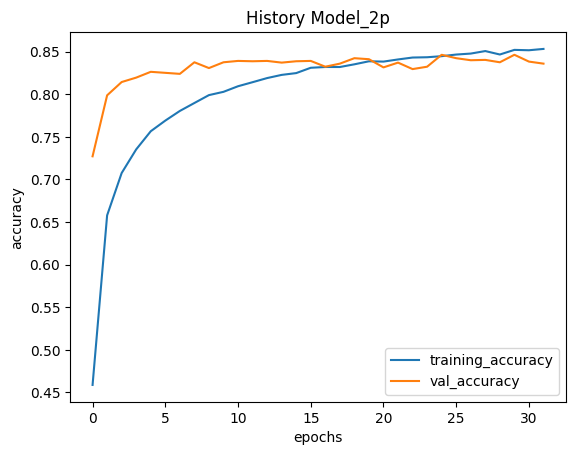

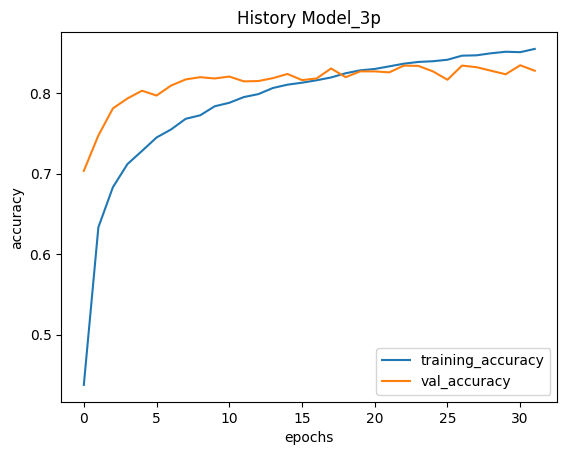

In [22]:
def plot_loss_curves(history, model_name='Model_?'):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))
    
    plt.figure() 
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title(f"History {model_name}")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

plot_loss_curves(history_2p, 'Model_2p')
plot_loss_curves(history_3p, 'Model_3p')



## Fine-tuned models

Using the models from the pretrained model section after training it with our dataset and final layers does conform with what can be found on the keras documentation. But it seems that most guides prefer to immediatly unfreeze part of the pretrained model and fit just once.

### Model_3F

In [ ]:
model_3f = tf.keras.models.load_model('saved_models/CNN/model_3p_202303101405')

# Check its architecture, (cleared since it is so long)
#model_3f.summary()

In [31]:
loss, acc = model_3f.evaluate(data_test, batch_size=1, verbose=1)

print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))
print(model_3f.predict(data_test).shape)

79/79 [==============================] - 6s 65ms/step - loss: 0.7038 - accuracy: 0.8628
Restored model, accuracy: 86.28%
79/79 [==============================] - 6s 61ms/step
(2500, 500)


In [ ]:
# https://keras.io/api/applications/

#for i, layer in enumerate(model_3f.layers):
#    print(i, layer.name)

In [32]:
for layer in model_3f.layers[:249]:
    layer.trainable = False
for layer in model_3f.layers[249:]:
    layer.trainable = True
# for layer in model.layers[249:]:
#     layer.trainable = True

In [33]:
# model_3f.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
#                  loss='categorical_crossentropy',
#                  metrics=['accuracy'])

model_3f.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history_3f = model_3f.fit(
    data_train,
    steps_per_epoch=len(data_train),
    validation_data=data_vali,
    validation_steps=len(data_vali),
    epochs=8
)

In [ ]:
test_loss_3f, test_acc_3f = model_3f.evaluate(data_test, batch_size=len(data_test), verbose=1)

# Appendix



## Issues


- Training time for Model_0 and Model_1 was rather high considering the amount of Trainable Parameters and used hardware.
- 
- 


## Sources



[Title of example](https://www.google.com)

[TensorFlow documentation, MNIST classification](https://www.tensorflow.org/tutorials/keras/classification)

https://www.markdownguide.org/extended-syntax/

https://www.tablesgenerator.com/markdown_tables

*Used before:*

[SNS docs heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

[Heatmap](https://www.youtube.com/watch?v=URbyDKfQT0Y)

[Mirrored images matplot](https://matplotlib.org/stable/tutorials/intermediate/imshow_extent.html)

[Rotate images matplot](https://stackoverflow.com/questions/31401812/matplotlib-rotate-image-file-by-x-degrees)

[EMNIST dataset](https://www.tensorflow.org/datasets/catalog/emnist)

[EMNIST research paper](https://arxiv.org/pdf/1702.05373v2.pdf)

[TensorFlow documentation, MNIST classification](https://www.tensorflow.org/tutorials/keras/classification)

[Tensorflow docs; loading Fasion_MNIST](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data)

[Numpy reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)
